In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from datetime import datetime
from dateutil.parser import parse
import gc

### 注：
### df1: cat2_new_smid
### df2: new_smid_login
### df3: user_view

In [3]:
df1 = pd.read_csv("~/inke/temp/cat2_new_smid.txt",sep='\t',
                  usecols = ['cat_2','smid','ymd','cc','cv','osversion','create_time']).iloc[:-2,:]
df1.head()

,cat_2,smid,create_time,cc,cv,osversion,ymd
0,360,Du0A/ITyKnxrVQaG13lc7l9Pu1JLmfUySx2ku3NX/JeDLT...,2019-01-23 11:28:05,TG36000,7.0.15,8.0.0,20190123.0
1,360,Du0A/qMpGx0H7EaTrXW6+LpXQf+JUbeUq22i0hxmK0N0Yc...,2018-10-23 15:55:08,TG36000,6.1.80,7.1.1,20181023.0
2,360,Du0A6Wwvjy8Jwg6kTVFSAB9o3rrAhqrOOAIc8trWqRDLyH...,2018-10-11 15:59:36,TG36000,6.1.75,5.1,20181011.0
3,360,Du0AB5uv8Cbt0CWYVnr3j91GJESSJicTsgcmbIZ0QMJaoQ...,2018-12-25 11:57:24,TG36000,7.0.01,8.1.0,20181225.0
4,360,Du0AD9+DJVIfcZpRHDdzrHrwiXmJ7Jjslc2ZlEQfS64sta...,2018-09-29 21:20:33,TG36000,6.1.70,6.0,20180929.0


In [ ]:
df1['ymd'] = df1['ymd'].astype('int')

In [18]:
usecols = ['cat_2','log_smid','log_ymd','c.cc','c.conn','c.md_einfo','c.md_logid',
           'c.md_mod','c.uid','c.smid','c.seq','c.info_enter','c.ymd']
df2 = pd.read_csv("~/inke/temp/new_smid_login.txt",sep='\t',usecols = usecols).iloc[:-2,:]
df2.rename(columns={"log_smid":"smid"},inplace = True)
gc.collect()
df2.head()

/home/liuyiming/anaconda3/install/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,34,13,17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cat_2,smid,log_ymd,c.cc,c.conn,c.jb,c.latitude,c.longitude,c.md_einfo,c.md_logid,c.md_mod,c.md_path,c.osversion,c.smid,c.uid,c.seq,c.info_enter,c.ymd
0,VIVO,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,20180920,TG36062,wifi,NaN,NaN,NaN,"{""enter"":""HALL_DISCOVER"",""get"":""resp"",""layout""...","259,264,281,282,285,229,236",1.0,NaN,android_21,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,2011994203,93.0,HALL_DISCOVER,20180920.0
1,VIVO,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,20180920,TG36062,wifi,NaN,NaN,NaN,"{""enter"":""FIRST_IN"",""get"":""resp"",""layout"":""""}","259,264,281,282,285,229,236",1.0,NaN,android_21,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,2011994203,15.0,FIRST_IN,20180920.0
2,VIVO,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,20180920,TG36062,wifi,NaN,NaN,NaN,"{""enter"":""HALL_DISCOVER"",""get"":""resp"",""layout""...","259,264,281,282,285,229,236",1.0,NaN,android_21,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,2011994203,96.0,HALL_DISCOVER,20180920.0
3,VIVO,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,20190101,TG36062,4G,NaN,NaN,NaN,"{""enter"":""FIRST_IN"",""type"":""resp""}","10001,10208,30001",1.0,NaN,android_21,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,0,12.0,FIRST_IN,20190101.0
4,百度手机助手,Du0C3nxIvXaV2P8OZUIfe4rAUdB1GztxOLz7vNupwkorQy...,20181129,TG36002,4G,NaN,NaN,NaN,"{""enter"":""FIRST_IN"",""type"":""resp""}","10001,10208,30001",1.0,NaN,android_27,Du0C3nxIvXaV2P8OZUIfe4rAUdB1GztxOLz7vNupwkorQy...,0,11.0,FIRST_IN,20181129.0


In [ ]:
df2['ymd'] = df2['log_ymd'].astype('int')

In [19]:
# cat2_new_smid 与 log 左连，将有注册页曝光和无注册页曝光的分成两组
df_log_raw = pd.merge(df1, df2, how = 'left', on = 'smid')
df_log = df_log_raw[df_log_raw['cat_2_x'] == or(['360','OPPO','VIVO','百度手机助手','阿里分发','应用宝'])]
df_log1 = df_log[df_log['c.smid'].notnull()]
df_log0 = df_log[df_log['c.smid'].isnull()]
df_log.head()

,cat_2_x,smid,create_time,client,package_name,cc,cv,ip,osversion,info_extra,...,c.md_einfo,c.md_logid,c.md_mod,c.md_path,c.osversion,c.smid,c.uid,c.seq,c.info_enter,c.ymd
0,360,Du0A/ITyKnxrVQaG13lc7l9Pu1JLmfUySx2ku3NX/JeDLT...,2019-01-23 11:28:05,android,com.meelive.ingkee,TG36000,7.0.15,1.86.57.83,8.0.0,"{""app_sign"":""308203c7308202afa00302010202046aa...",...,"{""enter"":""FIRST_IN"",""type"":""resp""}","10001,10208,30205,40202,50208,60202",1.0,NaN,android_26,Du0A/ITyKnxrVQaG13lc7l9Pu1JLmfUySx2ku3NX/JeDLT...,0,17.0,FIRST_IN,20190123.0
1,360,Du0A/qMpGx0H7EaTrXW6+LpXQf+JUbeUq22i0hxmK0N0Yc...,2018-10-23 15:55:08,android,com.meelive.ingkee,TG36000,6.1.80,223.149.248.176,7.1.1,"{""app_sign"":""308203c7308202afa00302010202046aa...",...,"{""enter"":""FIRST_IN"",""get"":""resp"",""layout"":""""}",NaN,1.0,NaN,android_25,Du0A/qMpGx0H7EaTrXW6+LpXQf+JUbeUq22i0hxmK0N0Yc...,2015567381,9.0,FIRST_IN,20181023.0
2,360,Du0A6Wwvjy8Jwg6kTVFSAB9o3rrAhqrOOAIc8trWqRDLyH...,2018-10-11 15:59:36,android,com.meelive.ingkee,TG36000,6.1.75,112.40.114.44,5.1,"{""app_sign"":""308203c7308202afa00302010202046aa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,360,Du0AB5uv8Cbt0CWYVnr3j91GJESSJicTsgcmbIZ0QMJaoQ...,2018-12-25 11:57:24,android,com.meelive.ingkee,TG36000,7.0.01,36.61.182.136,8.1.0,"{""app_sign"":""308203c7308202afa00302010202046aa...",...,"{""enter"":""FIRST_IN"",""type"":""resp""}","10001,10208,30001",1.0,NaN,android_27,Du0AB5uv8Cbt0CWYVnr3j91GJESSJicTsgcmbIZ0QMJaoQ...,0,10.0,FIRST_IN,20181225.0
4,360,Du0AD9+DJVIfcZpRHDdzrHrwiXmJ7Jjslc2ZlEQfS64sta...,2018-09-29 21:20:33,android,com.meelive.ingkee,TG36000,6.1.70,218.201.238.28,6.0,"{""app_sign"":""308203c7308202afa00302010202046aa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(len(df_log1),len(df_log0))
print(df_log0.columns)

5688453 1059132
Index(['cat_2_x', 'smid', 'create_time', 'client', 'package_name', 'cc', 'cv',
       'ip', 'osversion', 'info_extra', 'ymd', 'cat_2_y', 'log_ymd', 'c.aid',
       'c.cc', 'c.client_ip', 'c.conn', 'c.cv', 'c.devi', 'c.idfa', 'c.idfv',
       'c.imei', 'c.imsi', 'c.jb', 'c.latitude', 'c.lc', 'c.logid',
       'c.longitude', 'c.md_chk', 'c.md_eid', 'c.md_einfo', 'c.md_etime',
       'c.md_logid', 'c.md_mod', 'c.md_path', 'c.md_session', 'c.md_userid',
       'c.mtid', 'c.mtxid', 'c.osversion', 'c.proto', 'c.record_time',
       'c.smid', 'c.ua', 'c.uid', 'c.ndid', 'c.seq', 'c.info_enter', 'c.ymd'],
      dtype='object')


In [ ]:
df_log

In [6]:
df3 = pd.read_csv("~/inke/temp/user_view2.txt",sep=',').iloc[:-2,:]
df3.head()

/home/liuyiming/anaconda3/install/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ymd,cat2,new_smid,reg_smid,rec_simd,view_smid,act_view_smid
0,20190101,VIVO,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...
1,20181106,小米,Du0FT8OpE4NB3AyMRTWptkM9RUTDAeK53fvDK10LyYoLwv...,Du0FT8OpE4NB3AyMRTWptkM9RUTDAeK53fvDK10LyYoLwv...,Du0FT8OpE4NB3AyMRTWptkM9RUTDAeK53fvDK10LyYoLwv...,NaN,NaN
2,20180910,OPPO,Du0SE9yPoENLiR9+GDruaFExQu9mOX159mtZXzAugMFdw1...,NaN,NaN,NaN,NaN
3,20190108,VIVO,Du0WiFY0kotVuXuwXi3jrE3JxqRg9gJuHqSYVnkMb8nrOy...,Du0WiFY0kotVuXuwXi3jrE3JxqRg9gJuHqSYVnkMb8nrOy...,Du0WiFY0kotVuXuwXi3jrE3JxqRg9gJuHqSYVnkMb8nrOy...,Du0WiFY0kotVuXuwXi3jrE3JxqRg9gJuHqSYVnkMb8nrOy...,Du0WiFY0kotVuXuwXi3jrE3JxqRg9gJuHqSYVnkMb8nrOy...
4,20181030,VIVO,DuA2q+gfmItLUk0JpaynwpC2cNLY4xgvB1N4uwYCM4pl0D...,DuA2q+gfmItLUk0JpaynwpC2cNLY4xgvB1N4uwYCM4pl0D...,DuA2q+gfmItLUk0JpaynwpC2cNLY4xgvB1N4uwYCM4pl0D...,DuA2q+gfmItLUk0JpaynwpC2cNLY4xgvB1N4uwYCM4pl0D...,DuA2q+gfmItLUk0JpaynwpC2cNLY4xgvB1N4uwYCM4pl0D...


In [8]:
df3['ymd'] = df3['ymd'].astype('str')

In [26]:
grpd = df3.groupby(['cat2','ymd']).count().reset_index()
grpd.rename(columns={"rec_simd":"rec_smid"},inplace = True)
grpd['ymd'] = grpd['ymd'].apply(lambda x: parse(x))
grpd

,cat2,ymd,new_smid,reg_smid,rec_smid,view_smid,act_view_smid
0,360,2018-09-01,1603,1117,1157,424,426
1,360,2018-09-02,1371,919,949,348,349
2,360,2018-09-03,1454,1038,1039,372,370
3,360,2018-09-04,1358,928,965,346,346
4,360,2018-09-05,1431,988,1047,379,380
5,360,2018-09-06,1467,1000,1059,399,389
6,360,2018-09-07,1419,994,1030,374,379
7,360,2018-09-08,1390,938,1016,376,384
8,360,2018-09-09,1430,1013,1083,394,399
9,360,2018-09-10,1324,909,986,378,374


In [29]:
grpd[grpd['ymd']=='2019-01-01']

,cat2,ymd,new_smid,reg_smid,rec_smid,view_smid,act_view_smid,reg_rate,rec_rate,view_rate,act_view_rate
122,360,2019-01-01,316,229,180,102,103,0.724684,0.569620,0.322785,0.325949
291,OPPO,2019-01-01,3998,3327,3244,1992,2062,0.832166,0.811406,0.498249,0.515758
443,VIVO,2019-01-01,5721,4601,4306,2568,2642,0.804230,0.752666,0.448873,0.461807
595,三星,2019-01-01,118,114,113,73,82,0.966102,0.957627,0.618644,0.694915
747,华为,2019-01-01,3535,2871,2809,1759,1834,0.812164,0.794625,0.497595,0.518812
899,安卓官网,2019-01-01,57,56,56,29,30,0.982456,0.982456,0.508772,0.526316
1129,小米,2019-01-01,2649,1249,1117,533,549,0.471499,0.421669,0.201208,0.207248
1281,应用宝,2019-01-01,369,304,295,183,183,0.823848,0.799458,0.495935,0.495935
1433,应用宝CPD,2019-01-01,1088,891,821,434,456,0.818934,0.754596,0.398897,0.419118
1585,应用宝微下载,2019-01-01,1183,1106,1087,629,624,0.934911,0.918850,0.531699,0.527473


In [28]:
grpd['reg_rate'] = grpd['reg_smid']/grpd['new_smid']
grpd['rec_rate'] = grpd['rec_smid']/grpd['new_smid']
grpd['view_rate'] = grpd['view_smid']/grpd['new_smid']
grpd['act_view_rate'] = grpd['act_view_smid']/grpd['new_smid']

In [30]:
grpd.to_csv("~/inke/temp/grpd.csv",encoding = 'utf-8-sig')

### 查看 new_smid 的重复项个数

In [35]:
df1.columns

Index(['cat_2', 'smid', 'create_time', 'client', 'package_name', 'cc', 'cv',
       'ip', 'osversion', 'info_extra', 'ymd'],
      dtype='object')

#### hive 筛选条件为所有项不重复，但筛选之后还是有重复的 smid

In [37]:
print(len(set(df1['smid'])),"非重复个数")
print(len(df1['smid']),"总个数")
print(len(df1['smid'])-len(set(df1['smid'])),"重复个数")

4406417 非重复个数
4406621 总个数
204 重复个数


In [48]:
df1_drop = df1.drop_duplicates(['smid'])
print(len(df1_drop))

4406417
204


### 输出重复项的分渠道统计及分smid 详情
#### 问题归于 dws.smid_download 中新增 smid 存在重复项

In [10]:
df1[df1['smid'].duplicated()].groupby(['cat_2','ymd']).count().to_csv("~/inke/temp/duplicated_smid.txt")

In [12]:
df1[df1['smid'].duplicated()].to_csv("~/inke/temp/duplicated_smid_detail.txt")

In [42]:
df1[df1['smid'] == 'Duoj+sr4Z3mEUbFYWRBvTtck99ef+e/WrFHuMb0k8OBLR6+J/xdswisxkUEZ8g60V9k8h/FA7Mt31ifmey+PrBeA']

,cat_2,smid,create_time,client,package_name,cc,cv,ip,osversion,info_extra,ymd
1504459,360,Duoj+sr4Z3mEUbFYWRBvTtck99ef+e/WrFHuMb0k8OBLR6...,2018-11-28 09:53:47,android,com.meelive.ingkee,TG36000,6.2.25,122.143.27.35,6.0,"{""app_sign"":""308203c7308202afa00302010202046aa...",20181128.0


### 输出 cat2 列表

In [43]:
df2.head()

,cat_2,log_smid,log_ymd,c.aid,c.cc,c.client_ip,c.conn,c.cv,c.devi,c.idfa,...,c.osversion,c.proto,c.record_time,c.smid,c.ua,c.uid,c.ndid,c.seq,c.info_enter,c.ymd
0,VIVO,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,20180920,8843221acde95abb,TG36062,117.157.163.187,wifi,IK6.1.65_Android,861786038430296,NaN,...,android_21,8,1.537448e+12,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,vivovivoY51,2011994203,201809202055483015083fa57206edc05e97bac45bf754...,93.0,HALL_DISCOVER,20180920.0
1,VIVO,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,20180920,8843221acde95abb,TG36062,117.157.163.187,wifi,IK6.1.65_Android,861786038430296,NaN,...,android_21,8,1.537448e+12,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,vivovivoY51,2011994203,201809202055483015083fa57206edc05e97bac45bf754...,15.0,FIRST_IN,20180920.0
2,VIVO,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,20180920,8843221acde95abb,TG36062,117.157.163.187,wifi,IK6.1.65_Android,861786038430296,NaN,...,android_21,8,1.537448e+12,Du0AyY//DwEpDnil3Ygjr57jXgHtJqOunAblQO0E3BvMZD...,vivovivoY51,2011994203,201809202055483015083fa57206edc05e97bac45bf754...,96.0,HALL_DISCOVER,20180920.0
3,VIVO,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,20190101,de46448f8d862078,TG36062,223.104.1.106,4G,IK7.0.01_Android,861786038528172,NaN,...,android_21,8,1.546356e+12,Du0B+1fWIAQGrmhi6ocWt/kBTUo2H0fJPpVPOie7vTLPbp...,vivovivoY51,0,NaN,12.0,FIRST_IN,20190101.0
4,百度手机助手,Du0C3nxIvXaV2P8OZUIfe4rAUdB1GztxOLz7vNupwkorQy...,20181129,6358395f19d68afa,TG36002,221.7.7.104,4G,IK6.2.25_Android,544f827c34318049284faa78ffed47f9,NaN,...,android_27,8,1.543473e+12,Du0C3nxIvXaV2P8OZUIfe4rAUdB1GztxOLz7vNupwkorQy...,OPPOPACM00,0,NaN,11.0,FIRST_IN,20181129.0


### 查看 log_smid 重复个数

In [44]:
print(len(set(df2['log_smid'])),"非重复个数")
print(len(df2['log_smid']),"总个数")
print(len(df2['log_smid'])-len(set(df2['log_smid'])),"重复个数")

3347404 非重复个数
5687889 总个数
2340485 重复个数


In [47]:
df2_drop = df2.drop_duplicates(['log_smid'])
print(len(df2_drop))

3347404
2340485


In [52]:
df2_drop.rename(columns={"log_smid":"smid"},inplace = True)

/home/liuyiming/anaconda3/install/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [54]:
df1_2_drop = pd.merge(df1_drop, df2_drop, on = 'smid', how = 'left')

In [64]:
df1_2_drop.head()
df1_2_drop['log_exp'] = df1_2_drop['c.smid'].duplicated()+1
df1_2_drop['log_exp'][df1_2_drop['log_exp'] == 2]=0
Counter(df1_2_drop['log_exp'])

/home/liuyiming/anaconda3/install/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Counter({0: 1059066, 1: 3347351})

In [66]:
df1_2_drop['c.smid'].count()

3347350

### 查看从新增激活到注册页曝光的转化率

In [76]:
new2log = df1_2_drop.groupby(['cat_2_x','ymd']).count().reset_index()
new2log.head()

,cat_2_x,ymd,smid,create_time,client,package_name,cc,cv,ip,osversion,...,c.proto,c.record_time,c.smid,c.ua,c.uid,c.ndid,c.seq,c.info_enter,c.ymd,log_exp
0,360,20180901.0,1603,1603,1603,1603,1603,1603,1603,1603,...,1117,1117,1117,1117,1117,1111,1111,1107,1117,1603
1,360,20180902.0,1371,1371,1371,1371,1371,1371,1371,1371,...,919,919,919,919,919,907,907,914,919,1371
2,360,20180903.0,1454,1454,1454,1454,1454,1454,1454,1454,...,1038,1038,1038,1038,1038,1032,1032,1029,1038,1454
3,360,20180904.0,1358,1358,1358,1358,1358,1358,1358,1358,...,928,928,928,928,928,921,921,923,928,1358
4,360,20180905.0,1431,1431,1431,1431,1431,1431,1431,1431,...,988,988,988,988,988,981,981,978,988,1431


华为


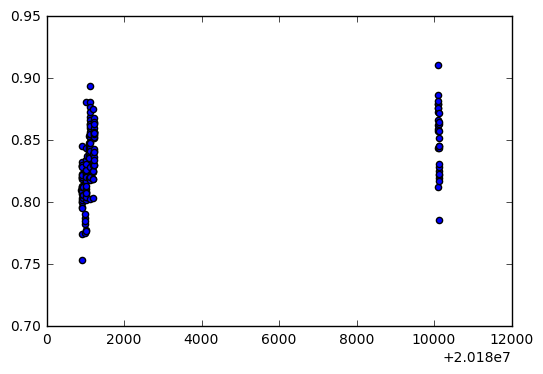

链斯达克


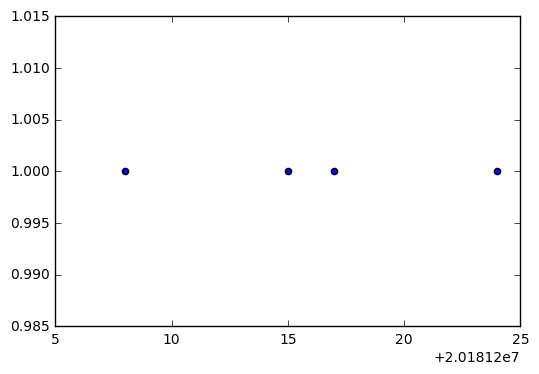

百度手机助手


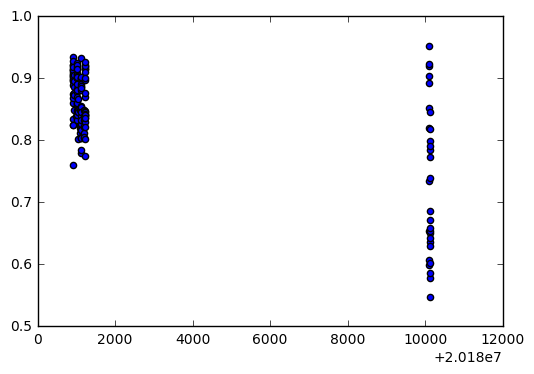

安卓官网


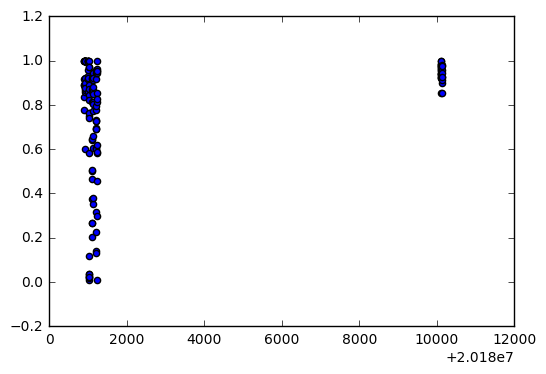

360


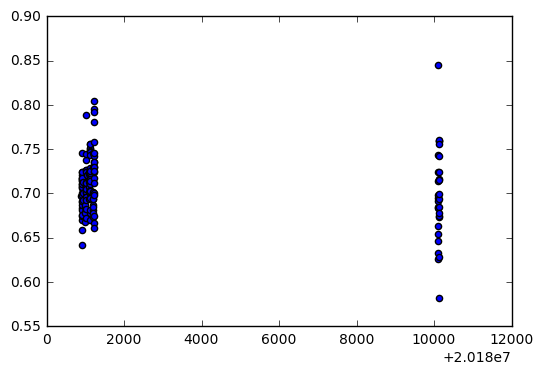

应用宝


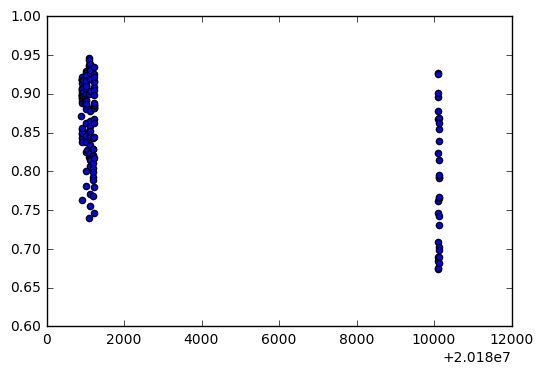

应用宝CPD


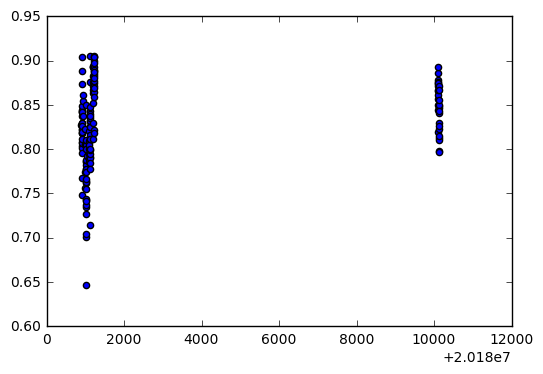

Google Play


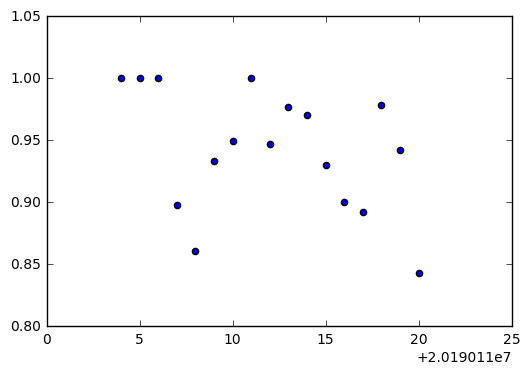

VIVO


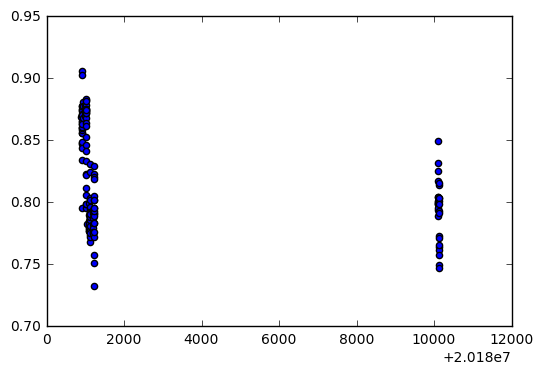

强制更新


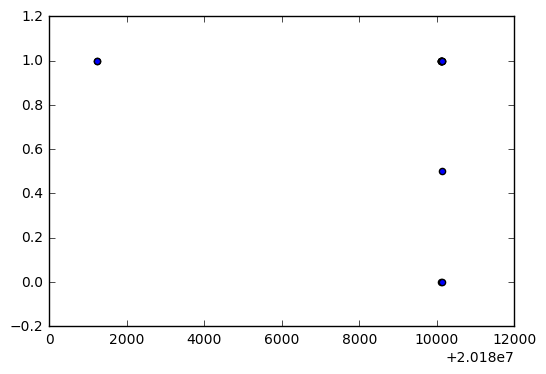

OPPO


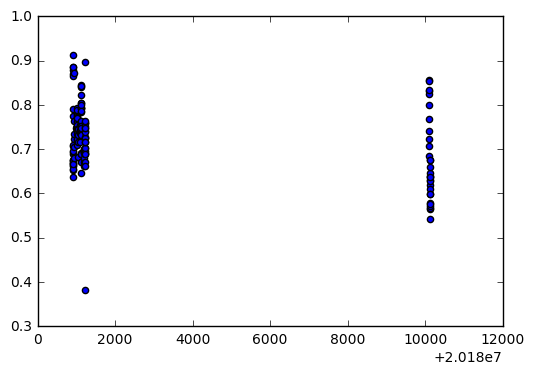

安智市场


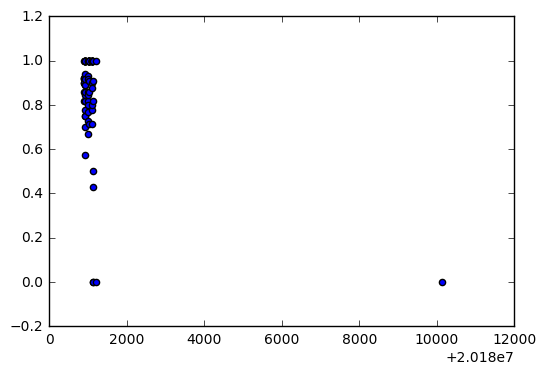

应用宝微下载


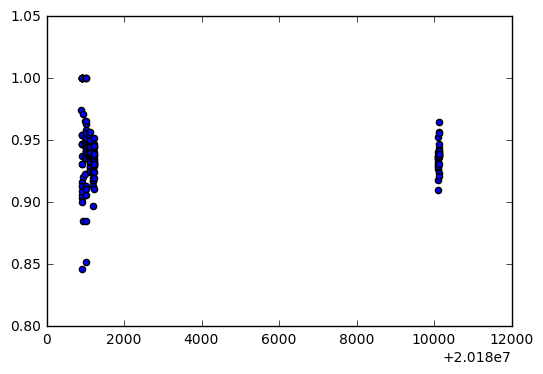

阿里分发


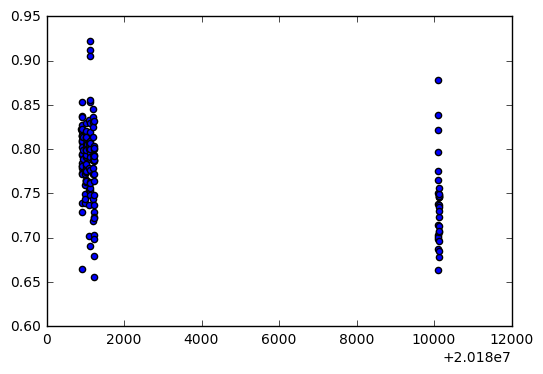

三星


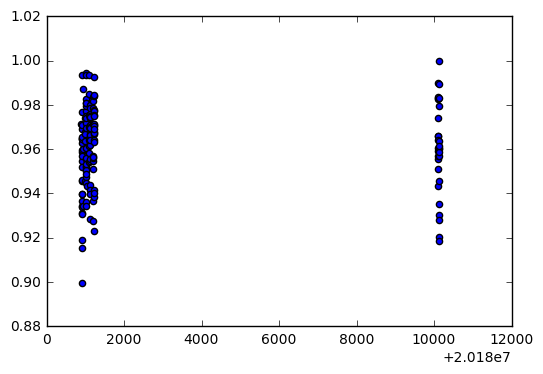

锤子


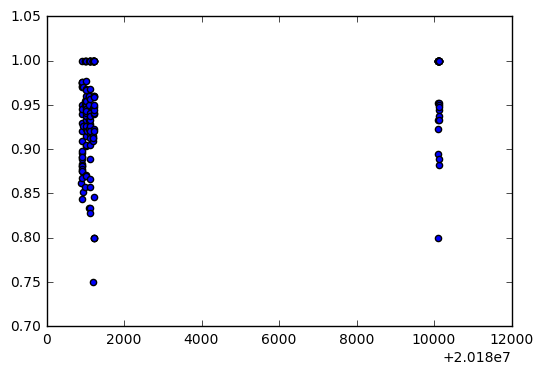

搜狗手机助手


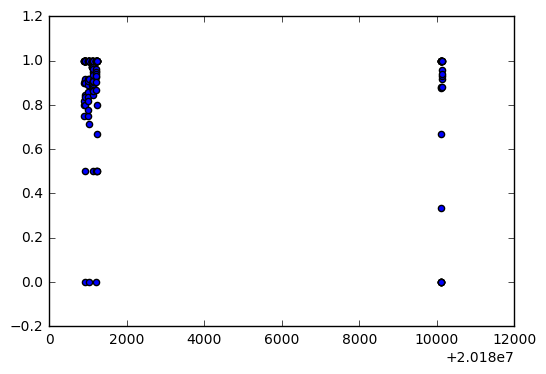

魅族


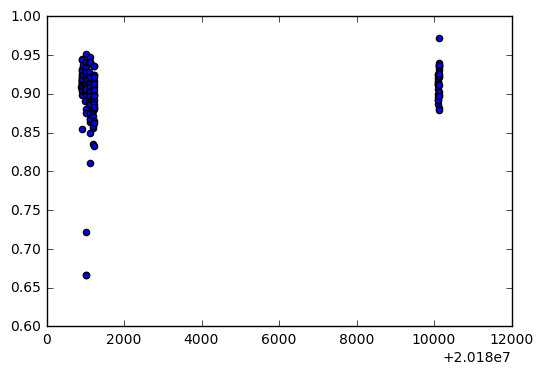

小米


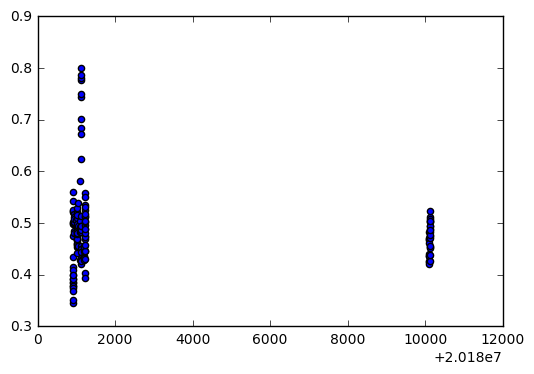

In [82]:
new2log['new2log_rate'] = new2log['c.smid']/new2log['smid']
for i in list(set(new2log['cat_2_x'])):
    print(i)
    plt.scatter(new2log['ymd'][new2log['cat_2_x'] == i],new2log['new2log_rate'][new2log['cat_2_x'] == i])
    plt.show()

In [80]:
new2log['ymd'][new2log['cat_2_x'] == '360']


0      20180901.0
1      20180902.0
2      20180903.0
3      20180904.0
4      20180905.0
5      20180906.0
6      20180907.0
7      20180908.0
8      20180909.0
9      20180910.0
10     20180911.0
11     20180912.0
12     20180913.0
13     20180914.0
14     20180915.0
15     20180916.0
16     20180917.0
17     20180918.0
18     20180919.0
19     20180920.0
20     20180921.0
21     20180922.0
22     20180923.0
23     20180924.0
24     20180925.0
25     20180926.0
26     20180927.0
27     20180928.0
28     20180929.0
29     20180930.0
          ...    
122    20190101.0
123    20190102.0
124    20190103.0
125    20190104.0
126    20190105.0
127    20190106.0
128    20190107.0
129    20190108.0
130    20190109.0
131    20190110.0
132    20190111.0
133    20190112.0
134    20190113.0
135    20190114.0
136    20190115.0
137    20190116.0
138    20190117.0
139    20190118.0
140    20190119.0
141    20190120.0
142    20190121.0
143    20190122.0
144    20190123.0
145    20190124.0
146    201

In [ ]:
for i in df_log.columns:
    print(i,'\t',len(set(df_log[i])),'\t',df_log[i][2])
    gc.collect()

cat_2_x 	 19 	 360
smid 	 4406417 	 Du0A6Wwvjy8Jwg6kTVFSAB9o3rrAhqrOOAIc8trWqRDLyHFFiP/ERt6QtVNIN8lEXuQrJpbXJEZW8le+Um4tAMmA
create_time 	 3527460 	 2018-10-11 15:59:36
client 	 1 	 android
package_name 	 2 	 com.meelive.ingkee
cc 	 19 	 TG36000
cv 	 81 	 6.1.75
ip 	 3018344 	 112.40.114.44
osversion 	 87 	 5.1
info_extra 	 4406199 	 {"app_sign":"308203c7308202afa00302010202046aa5b23d300d06092a864886f70d01010b","imei":"867556024274428","mac":"74:ac:5f:36:c8:24","md5":"55e04e3dd19f685c3e16964499140263"}
ymd 	 152 	 20181011.0
cat_2_y 	 20 	 nan
log_ymd 	 305 	 nan


In [34]:
df_log0['smid'][2]

'Du0A6Wwvjy8Jwg6kTVFSAB9o3rrAhqrOOAIc8trWqRDLyHFFiP/ERt6QtVNIN8lEXuQrJpbXJEZW8le+Um4tAMmA'